In [ ]:
# OLD: using the old .root data directly from Freddie
# New version is using the pythia code and simulated. Since there is no .hepmc from Freddie
# need to get the .hepmc again for IDEA card comparion.


In [221]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb


import warnings
warnings.filterwarnings("ignore")

## Theoretical $q^2$

In [222]:
def dGammaLambdacmu(q2):
    return 4.73286*10**(-7) * (1 - 0.011025/q2)**2 * q2 * np.sqrt(1024.56 + q2**2 - 2 * (165.091 + 36.8068 * q2)) * \
            ((-((np.sqrt(2) * (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2))) * np.sqrt(11.1092 - q2))/(1 - 0.0249412 * q2)) - (np.sqrt(2) * (\
            0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(62.5044 - q2))/(\
            1 - 0.0218313 * q2))**2 + (-((np.sqrt(2) * (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(11.1092 - q2))/(1 - 0.0249412 * q2)) + (np.sqrt(2) * (\
            0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(62.5044 - q2))/(\
            1 - 0.0218313 * q2))**2 + (1/np.sqrt(q2) * np.sqrt(11.1092 - q2) * (7.90597 * ((62.5044 * (-((1.0809 - \
            (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (\
            0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)))/(\
            62.5044 - q2) + (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)) - (7.90597 * (-((1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) * q2)/(62.5044 - q2)) - 1/np.sqrt(q2) * np.sqrt(62.5044 -\
            q2) * (3.33305 * ((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0218313 * q2) - (11.1092 * (-((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(\
            62.5044 - q2)))/(1 - 0.0218313 * q2)) + (0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)))/(-11.1092 + q2)) - (3.33305 * (-((0.6876 - (6.787 *\
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (\
            0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) *\
            q2)/(-11.1092 + q2)))**2 + (1/np.sqrt(q2) * np.sqrt(11.1092 - q2) * (7.90597 * ((62.5044 * (-((\
            1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) +\
            (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)))/(\
            62.5044 - q2) + (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)) - (7.90597 * (-((1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) * q2)/(62.5044 - q2)) + 1/np.sqrt(q2) * np.sqrt(62.5044 -\
            q2) * (3.33305 * ((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0218313 * q2) - (11.1092 * (-((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)))/(-11.1092 + q2)) - (3.33305 * (-((
            0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (\
            0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) *\
            q2)/(-11.1092 + q2)))**2 + 1/q2 * 0.0055125 * (3 * ((-(1/np.sqrt(q2)) * (7.90597 * ((0.6876 - (6.787 * (-7.16904 +\
            np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - (11.1092 * (-((0.6876 - \
            (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (\
            0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)))/(\
            -11.1092 + q2)) - 7.90597 * ((0.7446 - (7.7216 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044\
            - q2)))/(1 - 0.0253883 * q2) - (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044\
            - q2)))/(1 - 0.0218313 * q2) + (11.1092 * (-((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)))/(-11.1092 + q2))) * np.sqrt(11.1092 - q2) + 1/np.sqrt(q2) \
            * (3.33305 * ((62.5044 * (-((1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - \
            q2)))/(1 - 0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 -\
            q2)))/(1 - 0.0249412 * q2)))/(62.5044 - q2) + (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + 3.33305 * (-((62.5044 * (-((1.0809 - (11.6259 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (0.8137 - (\
            8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)))/(62.5044 -\
            q2)) - (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 \
            * q2) + (0.7494 - (7.253 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0221114 *q2)\
            )) * np.sqrt(62.5044 - q2))**2 + (1/np.sqrt(q2) * (7.90597 * ((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - (11.1092 * (-((0.6876 - (6.787 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (0.6876 - (6.5556 *\
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)))/(-11.1092 + q2)) - \
            7.90597 * ((0.7446 - (7.7216 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - \
            0.0253883 * q2) - (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0218313 * q2) + (11.1092 * (-((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + ( 0.6876 - ( 6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2))) * np.sqrt(11.1092 - q2) + 1/np.sqrt(q2) \
            * (3.33305 * ((62.5044 * (-((1.0809 - ( 11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 \
            - q2)))/( 1 - 0.0249412 * q2)) + ( 0.8137 - ( 8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2) + ( 1.0809 - (11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + 3.33305 * (-(( 62.5044 * \
            (-(( 1.0809 - ( 11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 \
            * q2)) + ( 0.8137 - ( 8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - \
            0.0249412 * q2)))/(62.5044 - q2)) - ( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2) + ( 0.7494 - (7.253 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0221114 *q2))) * np.sqrt(62.5044 - q2))**2) + (-((np.sqrt(2) * (1.0809 - (11.6259 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(11.1092 - q2))/(1 - 0.0249412 * q2)) \
            - (np.sqrt(2) * (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2))) * \
            np.sqrt(62.5044 - q2))/(1 - 0.0218313 * q2))**2 + (-((np.sqrt(2) * (1.0809 - (11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(11.1092 - q2))/(1 - 0.0249412 * q2)) + (\
            np.sqrt(2) * (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2))) * \
            np.sqrt(62.5044 - q2))/(1 - 0.0218313 * q2))**2 + (1/np.sqrt(q2) * np.sqrt(11.1092 - q2) * (7.90597 * ((\
            62.5044 * (-((1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)))/(62.5044 - q2) + (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) - (7.90597 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - \
            q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 \
            - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) * q2)/(62.5044 - q2)) - 1/np.sqrt(q2) * np.sqrt(\
            62.5044 - q2) * (3.33305 * ((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - \
            q2)))/(1 - 0.0218313 * q2) - (11.1092 * (-((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) + (0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2)) - (3.33305 * (-((0.6876 - (6.787 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (0.6876 - (6.5556 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) * q2)/(-11.1092 + \
            q2)))**2 + (1/np.sqrt(q2)* np.sqrt(11.1092 - q2) * (7.90597 * ((62.5044 * (-((1.0809 - (11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 \
            + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2) + (1.0809 - \
            (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) - (\
            7.90597 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - \
            0.0249412 * q2)) + (0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)) * q2)/(62.5044 - q2)) + 1/np.sqrt(q2) * np.sqrt(62.5044 - q2) * (3.33305 * ((0.6876 - (6.787 *\
            (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - (11.1092 * (-((\
            0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) + \
            (0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * \
            q2)))/(-11.1092 + q2)) - (3.33305 * (-((0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(7.16904 + \
            np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + (0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) * q2)/(-11.1092 + q2)))**2))







In [223]:
def dGammaLambdactau(q2):
    return 4.73286*10**-7 * (1 - 3.16128/q2)**2 * q2 * np.sqrt( 1024.56 + q2**2 -   2 * (165.091 +  36.8068 * q2)) * ((-((\
            np.sqrt(2) * (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2))) * \
            np.sqrt(11.1092 - q2))/( 1 - 0.0249412 * q2)) - ( np.sqrt(2) * (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - \
            q2)))/( 7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(62.5044 - q2))/( 1 - 0.0218313 * q2))**2 + (-(( np.sqrt(2) * \
            (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(11.1092 - \
            q2))/( 1 - 0.0249412 * q2)) + ( np.sqrt(2) * (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(62.5044 - q2))/( 1 - 0.0218313 * q2))**2 + (1/np.sqrt(q2) * np.sqrt(\
            11.1092 -  q2) * (7.90597 * (( 62.5044 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + ( 0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)))/( 62.5044 - q2) + (1.0809 - (11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) - ( 7.90597 * (-(( 1.0809 - \
            (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (\
            0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) * \
            q2)/( 62.5044 - q2)) -  1/np.sqrt(q2) * np.sqrt( 62.5044 -  q2) * (3.33305 * (( 0.6876 - (6.787 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - ( 11.1092 * (-(( 0.6876 - \
            (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + ( 0.6876 - \
            (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 \
            + q2)) - ( 3.33305 * (-(( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/(1 - 0.0218313 * q2)) + ( 0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 \
            - q2)))/( 1 - 0.0218313 * q2)) * q2)/(-11.1092 + q2)))**2 + (1/np.sqrt(q2) * np.sqrt(11.1092 -  q2) * (7.90597 * \
            (( 62.5044 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - \
            0.0249412 * q2)) + ( 0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 \
            - 0.0249412 * q2)))/( 62.5044 - q2) + ( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) - ( 7.90597 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 -\
            q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + ( 0.8137 - (8.5673 * (-7.16904 +\
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) * q2)/( 62.5044 - q2)) + \
            1/np.sqrt(q2) * np.sqrt( 62.5044 -  q2) * (3.33305 * (( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - ( 11.1092 * (-(( 0.6876 - (6.787 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2)) + ( 0.6876 - (6.5556 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2)) \
            - ( 3.33305 * (-(( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 \
            - 0.0218313 * q2)) + ( 0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/( 1 - 0.0218313 * q2)) * q2)/(-11.1092 + q2)))**2 +  1/q2 * 1.58064 * (3 * ((-(1/np.sqrt( q2)) * \
            (7.90597 * (( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0218313 * q2) - ( 11.1092 * (-(( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) + ( 0.6876 - ( 6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2)) -  7.90597 * (( 0.7446 - (7.7216 *\
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0253883 * q2) - ( 0.6876 - \
            (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2) + (\
            11.1092 * (-(( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0218313 * q2)) + ( 0.6876 - ( 6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2))) * np.sqrt( 11.1092 - q2) +  1/np.sqrt(q2) * (3.33305 * ((\
            62.5044 * (-(( 1.0809 - ( 11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)) + ( 0.8137 - ( 8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2) + ( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) +  3.33305 * (-(( 62.5044 * (-(( 1.0809 - ( 11.6259 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) + ( 0.8137 - (\
            8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)))/(62.5044 \
            - q2)) - ( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2) + ( 0.7494 - (7.253 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/( 1 - 0.0221114 * q2))) * np.sqrt(62.5044 - q2))**2 + (1/np.sqrt( q2) * (7.90597 * (( 0.6876 - (6.787 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2) - ( 11.1092 * (-((\
            0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) +\
            ( 0.6876 - ( 6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * \
            q2)))/(-11.1092 + q2)) -  7.90597 * (( 0.7446 - (7.7216 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0253883 * q2) - ( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 +\
            np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2) + ( 11.1092 * (-(( 0.6876 - (6.787 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) + ( 0.6876 - ( 6.5556 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2))) \
            * np.sqrt( 11.1092 - q2) +  1/np.sqrt(q2) * (3.33305 * (( 62.5044 * (-(( 1.0809 - ( 11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) + ( 0.8137 - ( 8.5673 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2) +\
            ( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * \
            q2)) +  3.33305 * (-(( 62.5044 * (-(( 1.0809 - ( 11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) + ( 0.8137 - ( 8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2)) - ( 1.0809 - (11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2) + ( 0.7494 - (7.253 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0221114 * q2))) * np.sqrt(62.5044 - q2))**2) + \
            (-(( np.sqrt(2) * (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2))) * \
            np.sqrt(11.1092 - q2))/( 1 - 0.0249412 * q2)) - ( np.sqrt(2) * (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - \
            q2)))/( 7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(62.5044 - q2))/( 1 - 0.0218313 * q2))**2 + (-(( np.sqrt(2) * \
            (1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2))) * np.sqrt(11.1092 - \
            q2))/( 1 - 0.0249412 * q2)) + ( np.sqrt(2) * (0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 +\
            np.sqrt(62.5044 - q2))) * np.sqrt(62.5044 - q2))/( 1 - 0.0218313 * q2))**2 + (1/np.sqrt(q2) * np.sqrt( 11.1092 - \
            q2) * (7.90597 * (( 62.5044 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + \
            np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) + ( 0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2) + ( 1.0809 - (11.6259 * (-7.16904 +\
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) - ( 7.90597 * (-(( 1.0809 - \
            (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + (\
            0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) * \
            q2)/(62.5044 - q2)) -  1/np.sqrt(q2) * np.sqrt( 62.5044 -  q2) * (3.33305 * (( 0.6876 - (6.787 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - ( 11.1092 * (-(( 0.6876 - \
            (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) + ( 0.6876 -\
            (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 \
            + q2)) - ( 3.33305 * (-(( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/(1 - 0.0218313 * q2)) + (  0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 \
            - q2)))/( 1 - 0.0218313 * q2)) * q2)/(-11.1092 + q2)))**2 + (1/np.sqrt(q2) * np.sqrt(11.1092 -  q2) * (7.90597 * \
            (( 62.5044 * (-(( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0249412 * q2)) + ( 0.8137 - (8.5673 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - \
            q2)))/( 1 - 0.0249412 * q2)))/(62.5044 - q2) + ( 1.0809 - (11.6259 * (-7.16904 + np.sqrt(62.5044 - q2)))/(\
            7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) - ( 7.90597 * (-(( 1.0809 - (11.6259 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0249412 * q2)) + ( 0.8137 - (8.5673 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0249412 * q2)) * q2)/(62.5044 - \
            q2)) +  1/np.sqrt(q2) * np.sqrt( 62.5044 -  q2) * (3.33305 * (( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - \
            q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - 0.0218313 * q2) - ( 11.1092 * (-(( 0.6876 - (6.787 * (-7.16904 + \
            np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)) + ( 0.6876 - (6.5556 * \
            (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/( 1 - 0.0218313 * q2)))/(-11.1092 + q2)) -\
            (3.33305 * (-(( 0.6876 - (6.787 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(1 - \
            0.0218313 * q2)) + ( 0.6876 - (6.5556 * (-7.16904 + np.sqrt(62.5044 - q2)))/( 7.16904 + np.sqrt(62.5044 - q2)))/(\
            1 - 0.0218313 * q2)) * q2)/(-11.1092 + q2)))**2))





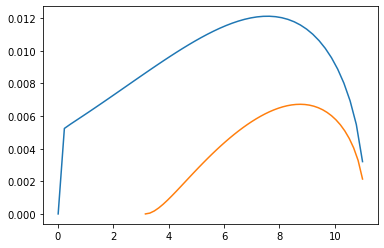

In [224]:
q2_mu = np.linspace(0.105**2, 11)
q2_tau = np.linspace(1.778**2, 11)


dGmu = dGammaLambdacmu(q2_mu)
dGtau = dGammaLambdactau(q2_tau)

plt.plot(q2_mu, dGmu)
plt.plot(q2_tau, dGtau)

## Loading Data

In [225]:
epsilon_pimu = 1/100

# 10noise
# modes_dt = {0: {'mode': './features/LambdacTauNu_10Noise.root', 'yields': 2.41e6}, 
#             1: {'mode': './features/LambdacMuNu_10Noise.root', 'yields': 2.88e7},
#             2: {'mode': './features/RLambdacInclusive_10Noise.root', 'yields': 6.33e5},
#             3: {'mode': './features/RLambdacCombCascade_10Noise.root', 'yields': 2.37e5},
#             4: {'mode': './features/RLambdacMisID_10Noise.root', 'yields': epsilon_pimu*1.63e7}
#            }

# 20noise
modes_dt = {0: {'mode': './features/LambdacTauNu_20Noise.root', 'yields': 2.39e6}, 
            1: {'mode': './features/LambdacMuNu_20Noise.root', 'yields': 4.76e7},
            2: {'mode': './features/RLambdacInclusive_20Noise.root', 'yields': 6.32e5},
            3: {'mode': './features/RLambdacCombCascade_20Noise.root', 'yields': 2.43e5},
            4: {'mode': './features/RLambdacMisID_20Noise.root', 'yields': epsilon_pimu*1.65e7}
           }



In [226]:
def load_train_test(modes_dt, size=0.5):
    np.random.seed(9)
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    num_lt = []
    
    # loop over different modes
    for i, (k, v) in enumerate(modes_dt.items()):
        print('\rReading:', i)
        file = uproot.open(v['mode'])
        df_i = file['t'].pandas.df()
        
        # shuffle the index for training and testing sets
        idx = df_i.index.tolist()
        np.random.shuffle(idx)
#         print(len(idx))
        idx = idx[:100000]    # if too much data
        num_lt.append(len(idx))    

        df_i['target'] = i    # add the target label
        df_i['weight'] = v['yields']/len(idx)
        print(df_i['weight'][0])
        
        # cut according to the fraction
        cut = int(np.ceil(len(idx) * size))
        df_train_i = df_i.loc[idx[:cut]]
        df_test_i = df_i.loc[idx[cut:]]
        
        # Put to the global dataframs
        df_train = pd.concat([df_train, df_train_i])
        df_test = pd.concat([df_test, df_test_i])
    
    df_train.reset_index(drop=True, inplace=True)
    df_test.reset_index(drop=True, inplace=True)
    
    print('train size: {} ({:.2f}%); test size: {} ({:.2f}%)'.format(len(df_train), 100*len(df_train)/(len(df_train)+len(df_test)), len(df_test), 100*len(df_test)/(len(df_train)+len(df_test))))
    print('data points per mode: ',num_lt)
    return df_train, df_test

    

In [227]:
tr_te_split = 0.5
df_train, df_test = load_train_test(modes_dt, tr_te_split)
# make a copy
df_train_o, df_test_o = df_train.copy(), df_test.copy()

Reading: 0
352.0400648107232
Reading: 1
1046.9131457980513
Reading: 2
158.31663326653307
Reading: 3
158.10019518542614
Reading: 4
1.65
train size: 78894 (50.00%); test size: 78891 (50.00%)
data points per mode:  [6789, 45467, 3992, 1537, 100000]


In [228]:
def relabel(x):
    if x == 0:    # tau
        return 0
    elif x == 1:    # mu
        return 1
    else:    # other bkg
        return 2

In [229]:
# relabel the, all bkg become one label
df_train['target'] = df_train['target'].apply(relabel)
df_test['target'] = df_test['target'].apply(relabel)

In [230]:
df_train.columns

Index(['iEvt', 'q2', 'miss2', 'pB', 'EB', 'pHc', 'EHc', 'pMu', 'EMu',
       'sMinMuBVert', 'sMinMuHcVert', 'sMinMuTr', 'sMinHcTr', 'sPVHc', 'mHcMu',
       'pPerp', 'mCorr', 'D0Max', 'DzMax', 'D0Sum', 'DzSum', 'ENeutral03',
       'ENeutral06', 'ENeutral03Hadron', 'ENeutral06Hadron',
       'ENeutral03Photon', 'ENeutral06Photon', 'ECharge03', 'ECharge06',
       'ECharge03PV', 'ECharge06PV', 'ECharge03DV', 'ECharge06DV', 'mK0SHcMu',
       'pK0S', 'q2True', 'miss2True', 'EBTrue', 'pBTrue', 'sMinMuHcVertTrue',
       'target', 'weight'],
      dtype='object')

In [231]:
# features = ['q2', 'miss2', 
#             'pB', 'EB', 
#             'pHc', 'EHc', 
#             'pMu', 'EMu',
#             'sMinMuHcVert', 'sMinMuTr', 'sMinHcTr', 'sPVHc', 
#             'mHcMu',
#             'pPerp', 'mCorr', 
#             'D0Max', 'DzMax', 'D0Sum', 'DzSum', 
#             'ENeutral03','ENeutral06', 
#             'ENeutral03Hadron', 'ENeutral06Hadron',
#             'ENeutral03Photon', 'ENeutral06Photon', 
#             'ECharge03', 'ECharge06',
#             'ECharge03PV', 'ECharge06PV', 
#             'ECharge03DV', 'ECharge06DV', 
#             'mK0SHcMu', 'pK0S'
#            ]

features = ['q2', 'miss2', 
            'pB', 'EB', 
            'pHc', 'EHc', 
            'pMu', 'EMu',
            'sMinMuHcVert', 'sMinMuTr', 'sMinHcTr', 'sPVHc', 
            'mHcMu',
            'pPerp', 'mCorr', 
            'D0Max', 'DzMax', 'D0Sum', 'DzSum', 
            'ENeutral03','ENeutral06', 
            'ENeutral03Hadron', 'ENeutral06Hadron',
            'ENeutral03Photon', 'ENeutral06Photon', 
            'ECharge03', 'ECharge06',
            'ECharge03PV', 'ECharge06PV', 
            'ECharge03DV', 'ECharge06DV'
           ]

In [232]:
df_train[features] = df_train[features].replace([99999, -np.inf, np.inf], np.nan)
df_test[features] = df_test[features].replace([99999, -np.inf, np.inf], np.nan)

## Reweight by $q^2
$

In [233]:
# replace some values that have q2 larger than the max, by the max
df_train_o.loc[(df_train_o['q2True']>=11) & ((df_train_o.target==0) | (df_train_o.target==1)), 'q2True'] = 10.9
df_train.loc[(df_train['q2True']>=11) & ((df_train.target==0) | (df_train.target==1)), 'q2True'] = 10.9
df_test.loc[(df_test['q2True']>=11) & ((df_test.target==0) | (df_test.target==1)), 'q2True'] = 10.9

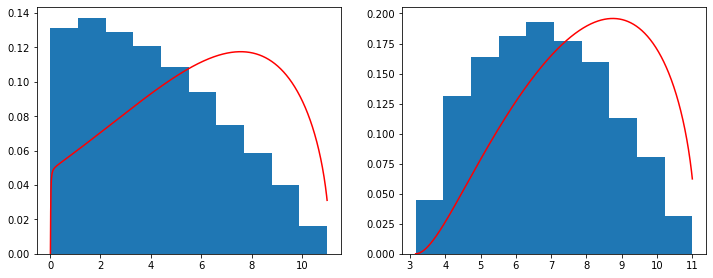

In [234]:
bins = 10

plt.figure(figsize=(12, 10))

# plot for mu
ax1 = plt.subplot(221)
range_mu = [0.105**2, 11]
ax1.hist(df_train_o[df_train_o.target==1]['q2True'], bins=bins, density=True, range=range_mu);
q2_mu = np.linspace(range_mu[0], range_mu[1], 1000, endpoint=True)
dGmu = dGammaLambdacmu(q2_mu)
ax1.plot(q2_mu, dGmu/np.trapz(dGmu, x=q2_mu), color='red', label='theoretical')

# plot for tau
ax2 = plt.subplot(222)
range_tau = [1.778**2, 11]
ax2.hist(df_train_o[df_train_o.target==0]['q2True'], bins=bins, density=True, range=range_tau);
q2_tau = np.linspace(range_tau[0], range_tau[1], 1000, endpoint=True)
dGtau = dGammaLambdactau(q2_tau)
ax2.plot(q2_tau, dGtau/np.trapz(dGtau, x=q2_tau), color='red', label='theoretical')

In [235]:
# reweight according to q^2
def find_m_rw(dGamma, df_train, target, range_, bin_num=10):
    # get the truth q2 array
    q2 = df_train[df_train.target==target]['q2True'].values    

    # Simulated bins
    hist, bins = np.histogram(a=q2, bins=bin_num, density=True, range=range_)
    width = np.diff(bins)
    center = (bins[:-1] + bins[1:]) / 2

    # Theoretical bins
    th_w = []
    for i in range(bin_num):
        dx = -(bins[i] - bins[i+1])/10
        x = np.linspace(bins[i], bins[i+1], 1000)
        y = dGamma(q2=x)
        th_w.append(np.trapz(y, dx=dx))    # Find area under curve
    # normalize
    th_w = th_w / sum(th_w) / width

    # reweighting
    m_rw = th_w / hist
    m_rw[np.isinf(m_rw)] = 0
    
    # return the values of each bin, and the bin bounds
    return m_rw, bins





# add the reweighting column to th dataframe
def add_m_rw(target, m_rw, bins, df):
    for i in range(len(bins)-1):
        df.loc[(df['target']==target) & (df['q2True']>=bins[i]) & (df['q2True']<bins[i+1]), 'm_rw'] = m_rw[i]
    
#     print(df.loc[df['target']==target, 'weight'].sum())
#     df.loc[df.target==target, 'm_rw'] = df.loc[df.target==target, 'm_rw']/(df.loc[df.target==target, 'm_rw'].sum())
    df.loc[df['target']==target, 'reweight'] = df.loc[df['target']==target, 'weight'] * df.loc[df.target==target, 'm_rw']
    df = df.drop(columns = ['m_rw'])
    
#     print(df.loc[df.target==target, 'reweight'].sum())
#     print()
    return df

In [236]:
# getting the weightings, and the bin bounds
m_rw_tau, bins_tau = find_m_rw(dGammaLambdactau, df_train_o, target=0, range_=range_tau)
m_rw_mu, bins_mu = find_m_rw(dGammaLambdacmu, df_train_o, target=1, range_=range_mu)

# duplicate the column for inputting to the function to get the reweight column
df_train_o['reweight'] = df_train_o['weight']
df_train['reweight'] = df_train['weight']
df_test['reweight'] = df_test['weight']

df_train_o = add_m_rw(target=0, m_rw=m_rw_tau, bins=bins_tau, df=df_train_o)
df_train_o = add_m_rw(target=1, m_rw=m_rw_mu, bins=bins_mu, df=df_train_o)

df_train = add_m_rw(target=0, m_rw=m_rw_tau, bins=bins_tau, df=df_train)
df_train = add_m_rw(target=1, m_rw=m_rw_mu, bins=bins_mu, df=df_train)

df_test = add_m_rw(target=0, m_rw=m_rw_tau, bins=bins_tau, df=df_test)
df_test = add_m_rw(target=1, m_rw=m_rw_mu, bins=bins_mu, df=df_test)


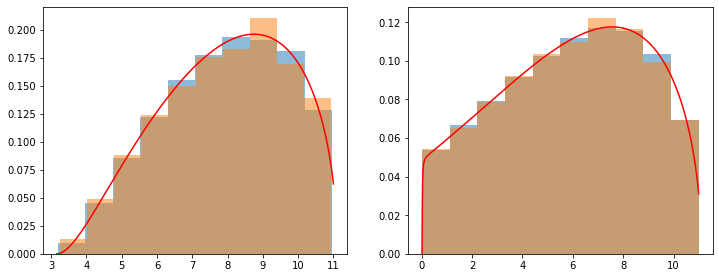

In [237]:
bins = 10

plt.figure(figsize=(12, 10))

# reweighted plot for tau, in testing 
ax1 = plt.subplot(221)
ax1.hist(df_train[df_train.target==0]['q2True'], bins=10, weights=df_train[df_train.target==0]['reweight'], density=True, alpha=0.5);
ax1.hist(df_test[df_test.target==0]['q2True'], bins=10, weights=df_test[df_test.target==0]['reweight'], density=True, alpha=0.5);
ax1.plot(q2_tau, dGtau/np.trapz(dGtau, x=q2_tau), color='red', label='theoretical')

# reweighted plot for mu, in testing 
ax2 = plt.subplot(222)
ax2.hist(df_train[df_train.target==1]['q2True'], bins=10, weights=df_train[df_train.target==1]['reweight'], density=True, alpha=0.5, range=[.105**2 ,11]);
ax2.hist(df_test[df_test.target==1]['q2True'], bins=10, weights=df_test[df_test.target==1]['reweight'], density=True, alpha=0.5, range=[.105**2 ,11]);
ax2.plot(q2_mu, dGmu/np.trapz(dGmu, x=q2_mu), color='red', label='theoretical')

## BDT

In [238]:
# getting the inputs and labels
X_train = df_train[features]
y_train = np.array(df_train.target)

# getting the inputs and labels
X_test = df_test[features]
y_test = np.array(df_train.target)

In [239]:
# trainging
X_train = df_train[features]
y_train = np.array([relabel(i) for i in df_train['target']])

# testing
X_test = df_test[features]
y_test = np.array([relabel(i) for i in df_test['target']])

# fitting, with reweighting
xgbc1 = xgb.XGBClassifier(seed=0)
xgbc1.fit(X_train, y_train, sample_weight=df_train.reweight.values);

In [240]:
# transform the BDT output to score
def soft(prob, target):
    return np.exp(prob[:, target])/(np.exp(prob).sum(axis=1)) 

# scores for training
df_bdt_train_s = df_train[['target', 'reweight']]
df_bdt_train_s.loc[:, 'pred0'] = soft(xgbc1.predict_proba(X_train), 0)
df_bdt_train_s.loc[:, 'pred1'] = soft(xgbc1.predict_proba(X_train), 1)

# score for testing 
df_bdt_test_s = df_test[['target', 'reweight']]
df_bdt_test_s.loc[:, 'pred0'] = soft(xgbc1.predict_proba(X_test), 0)
df_bdt_test_s.loc[:, 'pred1'] = soft(xgbc1.predict_proba(X_test), 1)

## Finding the optimal position to cut

In [241]:
def bdt_cut(df, cut1, cut2, signal1=0, signal2=1):
    df1 = df[(df['pred0'] >= cut1) & (df['pred1'] < cut2)]    # pass tau cut, not pass mu cut
    df2 = df[(df['pred0'] < cut1) & (df['pred1'] >= cut2)]    # pass mu cut, not pass tau cut
    
    S1 = df1[df1['target'] == signal1]['reweight'].values.sum()    # Number of tau signals
    B1 = df1[df1['target'] != signal1]['reweight'].values.sum()    # Number of tau bkg.
#     B1 = df1[df1['target'] != signal1]['reweight'].values.sum() + df1[df1['target'] == 1]['reweight'].values.sum()*0.28/100   # Number of tau bkg.
    
    S2 = df2[df2['target'] == signal2]['reweight'].values.sum()    # Number of mu signals
    B2 = df2[df2['target'] != signal2]['reweight'].values.sum()    # Number of mu bkg.
#     B2 = df2[df2['target'] != signal2]['reweight'].values.sum() + df2[df2['target'] == 1]['reweight'].values.sum()*0.28/100   # Number of mu bkg.
    
    return ((S1+B1)**0.5, (0.1*B1), S1/(np.sqrt(S1+B1))), ((S2+B2)**0.5, (0.1*B2), S2/(np.sqrt(S2+B2)))






# looping to find the optimal cut
def find_opt_cut(df_bdt_train_s, step=0.005):

    # tau cut
    cuts1 = np.arange(round(df_bdt_train_s.min()['pred0'], 2) - step, round(df_bdt_train_s.max()['pred0'], 2) + step, step)
    # mu cut
    cuts2 = np.arange(round(df_bdt_train_s.min()['pred1'], 2) - step, round(df_bdt_train_s.max()['pred1'], 2) + step, step)

    # store cuts (tau, and mu)
    c1_lt, c2_lt = [], []
    # store losses
    loss11, loss12 = [], []
    loss21, loss22 = [], []
    snr1, snr2 = [], []

    # loop over two cuts
    for i1, c1 in enumerate(cuts1):
        for i2, c2 in enumerate(cuts2):
            print("{}/{}; {}/{}".format(i1, len(cuts1), i2, len(cuts2)), end='\r')
            res1, res2 = bdt_cut(df_bdt_train_s, c1, c2)
            c1_lt.append(c1); c2_lt.append(c2)

            loss11.append(res1[0]); loss12.append(res1[1])
            loss21.append(res2[0]); loss22.append(res2[1])
            snr1.append(res1[2]), snr2.append(res2[2])

    # store the cuts and corresponding losses
    df_bdt_loss = pd.DataFrame([c1_lt, c2_lt, loss11, loss12, snr1, loss21, loss22, snr2]).T
    df_bdt_loss.columns = ['c1', 'c2', 'loss11', 'loss12', 'snr1', 'loss21', 'loss22', 'snr2']

    df_bdt_loss['loss1'] = (df_bdt_loss['loss11']**2 + df_bdt_loss['loss12']**2)**0.5
    df_bdt_loss['tot1'] = (df_bdt_loss['loss1'] - df_bdt_loss['loss1'].min())/(df_bdt_loss['loss1'].max() - df_bdt_loss['loss1'].min()) - \
        ((df_bdt_loss['snr1'] - df_bdt_loss['snr1'].min())/(df_bdt_loss['snr1'].max() - df_bdt_loss['snr1'].min()))

    df_bdt_loss['loss2'] = (df_bdt_loss['loss21']**2 + df_bdt_loss['loss22']**2)**0.5
    df_bdt_loss['tot2'] = (df_bdt_loss['loss2'] - df_bdt_loss['loss2'].min())/(df_bdt_loss['loss2'].max() - df_bdt_loss['loss2'].min()) - \
        ((df_bdt_loss['snr2'] - df_bdt_loss['snr2'].min())/(df_bdt_loss['snr2'].max() - df_bdt_loss['snr2'].min()))

    df_bdt_loss['tot'] = df_bdt_loss['tot1'] + df_bdt_loss['tot2']

    return df_bdt_loss.iloc[df_bdt_loss['tot'].argmin()][['c1', 'c2']].values

In [243]:
# c1, c2 = find_opt_cut(df_bdt_train_s)
# print(c1, c2)

# 10 noise
# c1, c2 = 0.345, 0.475

# 20 noise
c1, c2 = 0.325, 0.485


In [244]:
# apply the cut, to select tau and mu samples
df_bdt_test_s_cut_tau = df_bdt_test_s.loc[(df_bdt_test_s['pred0'] >= c1) & 
                                          (df_bdt_test_s['pred1'] <  c2)]

df_bdt_test_s_cut_mu = df_bdt_test_s.loc[(df_bdt_test_s['pred0'] <  c1) &
                                         (df_bdt_test_s['pred1'] >= c2)]


In [245]:
# Grouping the bkg. types
df_bdt_test_s_cut_tau['target'] = \
            df_test_o.loc[df_bdt_test_s_cut_tau.index]['target']

df_bdt_test_s_cut_mu['target'] = \
            df_test_o.loc[df_bdt_test_s_cut_mu.index]['target']



In [246]:
df_bdt_test_s_cut_tau['q2'] = df_test_o.loc[df_bdt_test_s_cut_tau.index]['q2']
df_bdt_test_s_cut_mu['q2'] = df_test_o.loc[df_bdt_test_s_cut_mu.index]['q2']

In [247]:
np.unique(df_bdt_test_s_cut_mu.target)

array([0, 1, 2, 3, 4])

## Calculating the yields

In [248]:
def cal_uncertainty(df, channel, channel_labels):
    n_lt = []
    for i in channel_labels.keys():
        # Select the signal/bkg. 
        dfi = df[df.target==i]
        if len(dfi) == 0:
            ni = 0
        else: 
            # reweighted number 
            ni = dfi.reweight.sum() / (1-tr_te_split)
        # Print out the table
        if i==channel:
            print('(*Signal)  {}:\t\t{:.2e}'.format(channel_labels[i], ni))
#             print(len(dfi))
        else:
            print('(*Bkg.)    {}:\t\t{:.2e}'.format(channel_labels[i], ni))
#             print(len(dfi))
        
        n_lt.append(ni)
    # Estimate the Fake-Lambda_c Bkg.
#     n_fakeLambdac = n_lt[1]*0.28/100
#     n_lt.append(n_fakeLambdac)
#     print('(*Bkg.)  {}:\t{:.2e}'.format('Fake-Lambdac', n_fakeLambdac))
    
    
    print('.'*60)
    s = n_lt[channel]    # Number of signals
    b = sum(n_lt)    # Number of Bkg. (including the signals, since signal fluctaution also contribute to the uncertainty)
    Z = (2*((s + b)*np.log(1+s/b) - s))**0.5    #Signifiance
    u = 1/Z    # Uncertainty
    print("# of Siganl ({}):\t{:.2e}".format(channel_labels[channel], s))
    print("# of Bkg. for {}:\t{:.2e}".format(channel_labels[channel], (b-s)))
    print('Significance for {}:\t{:.0f}'.format(channel_labels[channel], Z))
    print('Uncertainty for {}:\t{:.2e} ({:.2e})'.format(channel_labels[channel], u, u))
    print('Uncertainty at {}:\t{:.2e} ({:.2e})'.format('10 TeraZ', 1/((2*(((s*10) + (b*10))*np.log(1+(s*10)/(b*10)) - (s*10)))**0.5), 1/((2*(((s*10) + (b*10))*np.log(1+(s*10)/(b*10)) - (s*10)))**0.5)))
    print('S/B for {}:\t\t{:.2f}'.format(channel_labels[channel], s/(b-s)))
    print('\n'+'='*60+'\n'*5)
    print()
    
    u_10TeraZ = 1/((2*(((s*10) + (b*10))*np.log(1+(s*10)/(b*10)) - (s*10)))**0.5)
    return u, u_10TeraZ

In [249]:
CHANNEL_LABELS = {0: 'Jspi tau', 1: 'Jpsi mu', 2: 'Inclusive', 3: 'Comb.+Casc', 4: 'MisID'}
uFull_tau, uFull_tau10 = cal_uncertainty(df_bdt_test_s_cut_tau, 0, CHANNEL_LABELS)

uFull_mu, uFull_mu10 = cal_uncertainty(df_bdt_test_s_cut_mu, 1, CHANNEL_LABELS)

print("Overall Uncertainty: {:.2e}".format((uFull_mu**2 + uFull_tau**2)**0.5))
print("Overall Uncertainty 10-Tera Z: {:.2e}".format((uFull_mu10**2 + uFull_tau10**2)**0.5))

(*Signal)  Jspi tau:		1.71e+06
(*Bkg.)    Jpsi mu:		1.11e+06
(*Bkg.)    Inclusive:		6.65e+04
(*Bkg.)    Comb.+Casc:		4.14e+04
(*Bkg.)    MisID:		5.24e+03
............................................................
# of Siganl (Jspi tau):	1.71e+06
# of Bkg. for Jspi tau:	1.22e+06
Significance for Jspi tau:	918
Uncertainty for Jspi tau:	1.09e-03 (1.09e-03)
Uncertainty at 10 TeraZ:	3.44e-04 (3.44e-04)
S/B for Jspi tau:		1.39







(*Bkg.)    Jspi tau:		4.82e+05
(*Signal)  Jpsi mu:		4.42e+07
(*Bkg.)    Inclusive:		3.12e+05
(*Bkg.)    Comb.+Casc:		6.32e+04
(*Bkg.)    MisID:		3.25e+04
............................................................
# of Siganl (Jpsi mu):	4.42e+07
# of Bkg. for Jpsi mu:	8.89e+05
Significance for Jpsi mu:	5797
Uncertainty for Jpsi mu:	1.72e-04 (1.72e-04)
Uncertainty at 10 TeraZ:	5.45e-05 (5.45e-05)
S/B for Jpsi mu:		49.71







Overall Uncertainty: 1.10e-03
Overall Uncertainty 10-Tera Z: 3.49e-04


In [251]:
'{:.4f}'.format(1.10/0.959-1)

'0.1470'

In [218]:
# for q^2 binning (cut=7.15GeV)
def binbybin_correction(df_train, cut=7.15):
    Cs = {}
    for i in np.unique(df_train.target):
        dfi = df_train[df_train.target == i]
        N_q2Low = dfi[dfi.q2 < cut]['reweight'].sum()
        N_q2High = dfi[dfi.q2 >= cut]['reweight'].sum()
        N_q2truthLow = dfi[dfi.q2True < cut]['reweight'].sum()
        N_q2truthHigh = dfi[dfi.q2True >= cut]['reweight'].sum()
        Cs[i] = [N_q2truthLow/N_q2Low, N_q2truthHigh/N_q2High]
    return Cs

In [219]:
Cs = binbybin_correction(df_train, 7.15)
Cs[2] = [1, 1]    # replacing the bins correction for bkg. to 1
Cs[3] = [1, 1]    # replacing the bins correction for bkg. to 1
Cs[4] = [1, 1]    # replacing the bins correction for bkg. to 1

Cs

{0: [1.1971129106314942, 0.922824849460894],
 1: [0.9703047971687548, 1.0532782179708802],
 2: [1, 1],
 3: [1, 1],
 4: [1, 1]}

In [220]:
def diff_measurement(df, q2_cut, channel, Cs):
#     global dfHigh
    def _cal_uncertainty_(df, channel, channel_labels, Cs, region):
        n_lt = []
        for i in channel_labels.keys():
            # Select the signal/bkg. 
            dfi = df[df.target==i]
            if len(dfi) == 0:
                ni = 0
            else: 
                # reweighted number 
                ni = dfi.reweight.sum() / (1-tr_te_split) * Cs[i][region]
            # Print out the table
            if i==channel:
                print('(*Signal)  {}:\t{:.2e}'.format(channel_labels[i], ni))
            else:
                print('(*Bkg.)    {}:\t{:.2e}'.format(channel_labels[i], ni))

            n_lt.append(ni)
        # Estimate the Fake-J/psi Bkg.
#         n_fakeJpsi = n_lt[1]/.99998*.95*7/95/2
#         n_lt.append(n_fakeJpsi)
#         print('(*Bkg.)    {}:\t{:.2e}'.format('Fake-Jpsi', n_fakeJpsi))


        print('.'*40)
        s = n_lt[channel]    # Number of signals
        b = sum(n_lt)    # Number of Bkg. (including the signals, since signal fluctaution also contribute to the uncertainty)
        Z = (2*((s + b)*np.log(1+s/b) - s))**0.5    #Signifiance
        u = 1/Z    # Uncertainty
        print("# of Siganl ({}):     {:.2e}".format(channel_labels[channel], s))
        print("# of Bkg. for {}:     {:.2e}".format(channel_labels[channel], (b-s)))
        print('Significance for {}:  {:.0f}'.format(channel_labels[channel], Z))
        print('Uncertainty for {}:   {:.5e} ({:.2e})'.format(channel_labels[channel], u, u))
        print('Uncertainty at {}:    {:.5e} ({:.2e})'.format('10 TeraZ', 1/((2*(((s*10) + (b*10))*np.log(1+(s*10)/(b*10)) - (s*10)))**0.5), 1/((2*(((s*10) + (b*10))*np.log(1+(s*10)/(b*10)) - (s*10)))**0.5)))
        print('S/B for {}:           {:.2f}'.format(channel_labels[channel], s/(b-s)))
        print('\n'+'='*40)

#         for i in channel_labels.keys():
#             if i == channel:
#                 continue
#             else:
#                 print('{}/B:\t{:.2f}/{:.2f} = {:.2f}%'.format(channel_labels[i], n_lt[i], (b-s), n_lt[i]/(b-s)*100))
#         print('{}/B:\t{:.2f}/{:.2f} = {:.2f}%'.format('Fake-J/psi', n_lt[-1], (b-s), (n_lt[-1])/(b-s)*100))

        u10 = 1/((2*(((s*10) + (b*10))*np.log(1+(s*10)/(b*10)) - (s*10)))**0.5)
        return u, u10
    
    
    dfLow = df[df.q2 < q2_cut]
    dfHigh = df[df.q2 >= q2_cut]
#     print(dfHigh)
    print('#####   q^2 < 7.15   #####')
    print()
    u_Low, u_Low10 = _cal_uncertainty_(dfLow, channel, CHANNEL_LABELS, Cs, 0)
    print()
    print('#####   q^2 >= 7.15   #####')    
    print()
    u_High, u_High10 = _cal_uncertainty_(dfHigh, channel, CHANNEL_LABELS, Cs, 1)
    
    
    
    return u_Low, u_High, u_Low10, u_High10
    

In [192]:
uLow_tau, uHigh_tau, uLow_tau10, uHigh_tau10 = diff_measurement(df_bdt_test_s_cut_tau, 7.15, 0, Cs)

print('\n'*5)

uLow_mu, uHigh_mu, uLow_mu10, uHigh_mu10 = diff_measurement(df_bdt_test_s_cut_mu, 7.15, 1, Cs)

print('\n'*5)

print("Overall Uncertainty (Low):  {:.2e}".format((uLow_tau**2 + uLow_mu**2)**0.5))
print("Overall Uncertainty 10-Tera Z (Low):  {:.2e}".format((uLow_mu10**2 + uLow_tau10**2)**0.5))
print("Overall Uncertainty (High): {:.2e}".format((uHigh_tau**2 + uHigh_mu**2)**0.5))
print("Overall Uncertainty 10-Tera Z (High): {:.2e}".format((uHigh_tau10**2 + uHigh_mu10**2)**0.5))


#####   q^2 < 7.15   #####

(*Signal)  Jspi tau:	4.61e+05
(*Bkg.)    Jpsi mu:	1.92e+05
(*Bkg.)    Inclusive:	3.07e+04
(*Bkg.)    Comb.+Casc:	2.50e+04
(*Bkg.)    MisID:	1.75e+03
........................................
# of Siganl (Jspi tau):     4.61e+05
# of Bkg. for Jspi tau:     2.50e+05
Significance for Jspi tau:  500
Uncertainty for Jspi tau:   2.00182e-03 (2.00e-03)
Uncertainty at 10 TeraZ:    6.33030e-04 (6.33e-04)
S/B for Jspi tau:           1.85


#####   q^2 >= 7.15   #####

(*Signal)  Jspi tau:	1.37e+06
(*Bkg.)    Jpsi mu:	3.00e+05
(*Bkg.)    Inclusive:	4.11e+04
(*Bkg.)    Comb.+Casc:	1.68e+04
(*Bkg.)    MisID:	3.78e+03
........................................
# of Siganl (Jspi tau):     1.37e+06
# of Bkg. for Jspi tau:     3.62e+05
Significance for Jspi tau:  935
Uncertainty for Jspi tau:   1.06965e-03 (1.07e-03)
Uncertainty at 10 TeraZ:    3.38253e-04 (3.38e-04)
S/B for Jspi tau:           3.78







#####   q^2 < 7.15   #####

(*Bkg.)    Jspi tau:	2.42e+05
(*Signal)  Jps

## Saving Plots

In [193]:
df_plot = df_test

error for tau mode:  1.66
error for mu mode: 1.69


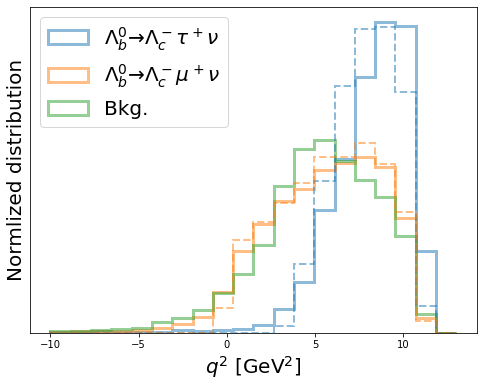

In [199]:
f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
range_=[-10,13]

ax1.hist(df_plot[(df_plot.target==0)]['q2'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^- \tau^+\nu$', alpha=0.5, color='C0');
ax1.hist(df_plot[(df_plot.target==1)]['q2'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-  \mu^+\nu$', alpha=0.5, color='C1');
ax1.hist(df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['q2'], weights=df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'Bkg.', alpha=0.5, color='C2');

ax1.legend(loc=2, fontsize=20)
ax1.hist(df_plot[(df_plot.target==0)]['q2True'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=2, label=r'$\Lambda_b^0\to \Lambda_c^- \tau^+\nu$', alpha=0.5, color='C0', linestyle='--');
ax1.hist(df_plot[(df_plot.target==1)]['q2True'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=2, label=r'$\Lambda_b^0\to \Lambda_c^- \mu^+\nu$', alpha=0.5, color='C1', linestyle='--');

ax1.set_ylabel('Normlized distribution', fontsize=20)
ax1.set_xlabel(r'$q^2$ [GeV$^2$]', fontsize=20)
ax1.set_yticks([])

f.savefig('./figures/Lambdabq2')
# f.savefig('./figures/Lambdabq2_20noise')


X_mea0 = df_plot[(df_plot.target==0)]['q2']
X_mea1 = df_plot[(df_plot.target==1)]['q2']
X_tru0 = df_plot[(df_plot.target==0)]['q2True']
X_tru1 = df_plot[(df_plot.target==1)]['q2True']

X0 = X_mea0 - X_tru0
X1 = X_mea1 - X_tru1

W0 = df_plot[(df_plot.target==0)]['reweight']
W1 = df_plot[(df_plot.target==1)]['reweight']

X_Wmean0 = sum(X0 * W0) / sum(W0)
X_Wmean1 = sum(X1 * W1) / sum(W1)

print("error for tau mode:  {:.2f}".format((sum((X0 - X_Wmean0)**2 * W0) / (sum(W0)*(len(W0)-1)/len(W0)))**0.5))
print("error for mu mode: {:.2f}".format((sum((X1 - X_Wmean1)**2 * W1) / (sum(W1)*(len(W1)-1)/len(W1)))**0.5))


error for mu mode:  2.37
error for tau mode: 2.88


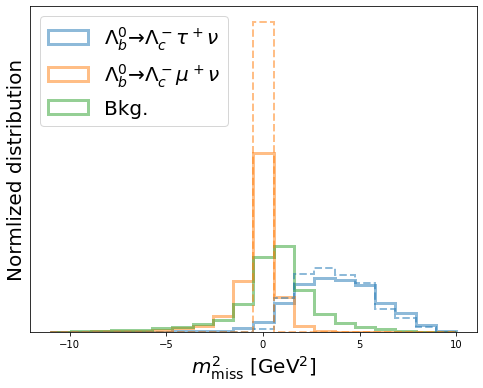

In [200]:
f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
range_=[-11,10]


ax1.hist(df_plot[(df_plot.target==0)]['miss2'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-  \tau^+\nu$', alpha=0.5, color='C0');
ax1.hist(df_plot[(df_plot.target==1)]['miss2'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-  \mu^+\nu$', alpha=0.5, color='C1');
ax1.hist(df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['miss2'], weights=df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'Bkg.', alpha=0.5, color='C2');

ax1.legend(loc=2, fontsize=20)
ax1.hist(df_plot[(df_plot.target==0)]['miss2True'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=2, label=r'true $\Lambda_b^0\to \Lambda_c^- \tau^+\nu$', alpha=0.5, color='C0', linestyle='--');
ax1.hist(df_plot[(df_plot.target==1)]['miss2True'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=2, label=r'true $\Lambda_b^0\to \Lambda_c^- \mu^+\nu$', alpha=0.5, color='C1', linestyle='--');

ax1.set_ylabel('Normlized distribution', fontsize=20)
ax1.set_xlabel(r'$m_{\rm miss}^2$ [GeV$^2$]', fontsize=20)
ax1.set_yticks([])

f.savefig('./figures/Lambdabmiss2')
# f.savefig('./figures/Lambdabmiss2_20noise')


X_mea0 = df_plot[(df_plot.target==0)]['miss2']
X_mea1 = df_plot[(df_plot.target==1)]['miss2']
X_tru0 = df_plot[(df_plot.target==0)]['miss2True']
X_tru1 = df_plot[(df_plot.target==1)]['miss2True']

X0 = X_mea0 - X_tru0
X1 = X_mea1 - X_tru1

W0 = df_plot[(df_plot.target==0)]['reweight']
W1 = df_plot[(df_plot.target==1)]['reweight']

X_Wmean0 = sum(X0 * W0) / sum(W0)
X_Wmean1 = sum(X1 * W1) / sum(W1)

print("error for mu mode:  {:.2f}".format((sum((X0 - X_Wmean0)**2 * W0) / (sum(W0)*(len(W0)-1)/len(W0)))**0.5))
print("error for tau mode: {:.2f}".format((sum((X1 - X_Wmean1)**2 * W1) / (sum(W1)*(len(W1)-1)/len(W1)))**0.5))



error for mu mode:  2.28
error for tau mode: 2.41


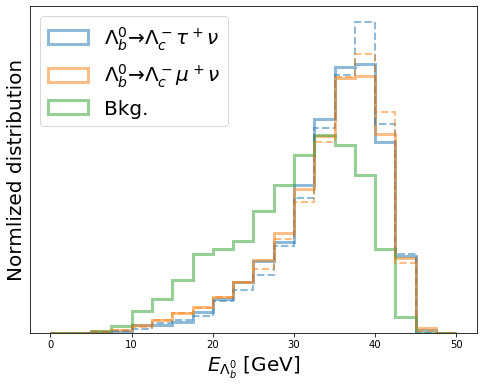

In [204]:
f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
range_=[0,50]

ax1.hist(df_plot[(df_plot.target==0)]['EB'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^- \tau^+\nu$', alpha=0.5, color='C0');
ax1.hist(df_plot[(df_plot.target==1)]['EB'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^- \mu^+\nu$', alpha=0.5, color='C1');
ax1.hist(df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['EB'], weights=df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'Bkg.', alpha=0.5, color='C2');

ax1.legend(loc=2, fontsize=20)
ax1.hist(df_plot[(df_plot.target==0)]['EBTrue'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=2, label=r'true $\Lambda_b^0\to \Lambda_c^- \tau^+\nu$', alpha=0.5, color='C0', linestyle='--');
ax1.hist(df_plot[(df_plot.target==1)]['EBTrue'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=2, label=r'true $\Lambda_b^0\to \Lambda_c^- \mu^+\nu$', alpha=0.5, color='C1', linestyle='--');

ax1.set_ylabel('Normlized distribution', fontsize=20)
ax1.set_xlabel(r'$E_{\Lambda_b^0}$ [GeV]', fontsize=20)
ax1.set_yticks([])

f.savefig('./figures/LambdabE')
# f.savefig('./figures/LambdabE_20noise')


X_mea0 = df_plot[(df_plot.target==0)]['EB']
X_mea1 = df_plot[(df_plot.target==1)]['EB']
X_tru0 = df_plot[(df_plot.target==0)]['EBTrue']
X_tru1 = df_plot[(df_plot.target==1)]['EBTrue']

X0 = X_mea0 - X_tru0
X1 = X_mea1 - X_tru1

W0 = df_plot[(df_plot.target==0)]['reweight']
W1 = df_plot[(df_plot.target==1)]['reweight']

X_Wmean0 = sum(X0 * W0) / sum(W0)
X_Wmean1 = sum(X1 * W1) / sum(W1)

print("error for mu mode:  {:.2f}".format((sum((X0 - X_Wmean0)**2 * W0) / (sum(W0)*(len(W0)-1)/len(W0)))**0.5))
print("error for tau mode: {:.2f}".format((sum((X1 - X_Wmean1)**2 * W1) / (sum(W1)*(len(W1)-1)/len(W1)))**0.5))


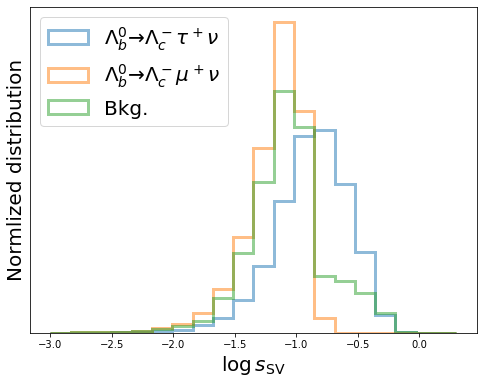

In [209]:
f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
range_=[-3,0.3]


ax1.hist(np.log10(df_plot[(df_plot.target==0)]['sMinMuBVert']), weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-  \tau^+\nu$', alpha=0.5);
ax1.hist(np.log10(df_plot[(df_plot.target==1)]['sMinMuBVert']), weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-  \mu^+\nu$', alpha=0.5);
ax1.hist(np.log10(df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['sMinMuBVert']), weights=df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'Bkg.', alpha=0.5);


# ax1.hist(np.log10(df_plot[(df_plot.target==0)]['sMinMuHcVertTrue']), weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, alpha=0.5, color='C0', linestyle='--');
# ax1.hist(np.log10(df_plot[(df_plot.target==1)]['sMinMuHcVertTrue']), weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, alpha=0.5, color='C1', linestyle='--');

ax1.set_ylabel('Normlized distribution', fontsize=20)
ax1.set_xlabel(r'$\log{s_{\rm SV}}$', fontsize=20)
ax1.set_yticks([])
ax1.legend(loc=2, fontsize=20)

f.savefig('./figures/Lambdablogssv')
# f.savefig('./figures/Lambdablogssv_20noise')


In [210]:
features

['q2',
 'miss2',
 'pB',
 'EB',
 'pHc',
 'EHc',
 'pMu',
 'EMu',
 'sMinMuHcVert',
 'sMinMuTr',
 'sMinHcTr',
 'sPVHc',
 'mHcMu',
 'pPerp',
 'mCorr',
 'D0Max',
 'DzMax',
 'D0Sum',
 'DzSum',
 'ENeutral03',
 'ENeutral06',
 'ENeutral03Hadron',
 'ENeutral06Hadron',
 'ENeutral03Photon',
 'ENeutral06Photon',
 'ECharge03',
 'ECharge06',
 'ECharge03PV',
 'ECharge06PV',
 'ECharge03DV',
 'ECharge06DV']

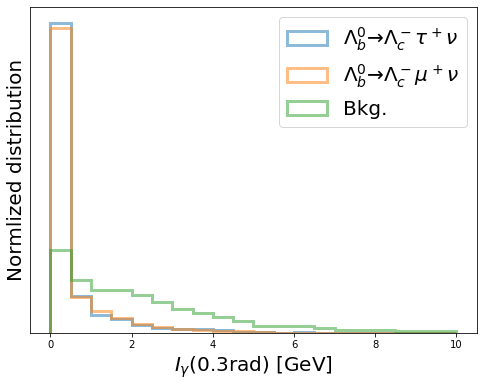

In [213]:
f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
range_=[0,10]


ax1.hist(df_plot[(df_plot.target==0)]['ENeutral03Photon'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^- \tau^+\nu$', alpha=0.5);
ax1.hist(df_plot[(df_plot.target==1)]['ENeutral03Photon'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^- \mu^+\nu$', alpha=0.5);
ax1.hist(df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['ENeutral03Photon'], weights=df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'Bkg.', alpha=0.5);
ax1.set_ylabel('Normlized distribution', fontsize=20)
ax1.set_xlabel(r'$I_\gamma(0.3\rm rad)$ [GeV]', fontsize=20)
ax1.set_yticks([])
ax1.legend(loc=1, fontsize=20)

f.savefig('./figures/Lambdabisolation')


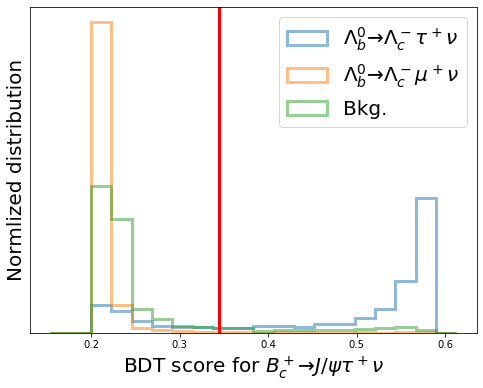

In [215]:

df_plot = df_bdt_test_s
f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)
pred0_max = df_plot[(df_plot.target==0)]['pred0'].max() 
pred0_min = df_plot[(df_plot.target==0)]['pred0'].min() 
pred0_diff = pred0_max - pred0_min
range_=[pred0_min - 0.1*pred0_max, pred0_max + 0.1*pred0_diff]
# print(range_)

ax1.hist(df_plot[(df_plot.target==0)]['pred0'], weights=df_plot[df_plot.target==0]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-\tau^+\nu$', alpha=0.5);
ax1.hist(df_plot[(df_plot.target==1)]['pred0'], weights=df_plot[df_plot.target==1]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'$\Lambda_b^0 \to \Lambda_c^-\mu^+\nu$', alpha=0.5);
ax1.hist(df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['pred0'], weights=df_plot[(df_plot.target!=0)&(df_plot.target!=1)]['reweight'], bins=20, range=range_, density=True, histtype='step', lw=3, label=r'Bkg.', alpha=0.5);
ax1.set_ylabel('Normlized distribution', fontsize=20)
ax1.set_xlabel(r'BDT score for $B_c^+\to J/\psi \tau^+\nu$', fontsize=20)
ax1.set_yticks([])
ax1.legend(loc=1, fontsize=20)
ax1.axvline(c1, color='red', lw=3)

f.savefig('./figures/LambdabtauBDT')


In [100]:
d = xgbc1.get_booster().get_score()
dict(sorted(d.items(), key=lambda item: -1*item[1]))
# R(Jpsi)

{'miss2': 1341.0,
 'q2': 1141.0,
 'mHcMu': 1067.0,
 'pB': 1024.0,
 'sPVHc': 1024.0,
 'pHc': 942.0,
 'sMinMuHcVert': 918.0,
 'pMu': 839.0,
 'mCorr': 819.0,
 'pPerp': 686.0,
 'ENeutral03Photon': 572.0,
 'ENeutral06Photon': 528.0,
 'ENeutral06': 453.0,
 'ENeutral03': 436.0,
 'sMinMuTr': 302.0,
 'sMinHcTr': 281.0,
 'ENeutral06Hadron': 273.0,
 'ENeutral03Hadron': 261.0,
 'ECharge06': 256.0,
 'ECharge06PV': 247.0,
 'ECharge03': 224.0,
 'ECharge03PV': 185.0,
 'ECharge06DV': 132.0,
 'ECharge03DV': 121.0,
 'D0Max': 85.0,
 'EHc': 84.0,
 'DzSum': 79.0,
 'DzMax': 76.0,
 'D0Sum': 72.0}

In [27]:
df_test['sMinMuHcVert']

0        0.012823
1        0.021189
2        0.046108
3        0.205834
4        0.203519
           ...   
54597    0.013388
54598    0.438956
54599    0.014942
54600    0.004887
54601    0.015372
Name: sMinMuHcVert, Length: 54602, dtype: float32

In [35]:
# df_plot = df_test.loc[df_test_o[df_test_o['target']!=4].index]
df_plot = df_test.loc[df_test_o[df_test_o['target']!=4].index]
df_plot = df_test
